## Exploratory data analaysis (EDA) of Insurance data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Read the data

In [9]:
# insurance_df = pd.read_csv("./insurance-data.csv")

insurance_df = pd.read_csv("C:\\Users\\Sourav Karmakar\\Desktop\\Work\\LogicMojo\\logicmojo-data-science-april-2025\\Lecture_materials\\Class-22-28-06-2025-Inferential_statistics_hands_on_and_EDA\\insurance-data.csv")

insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Basic analysis

- Understand the size of the data
- Basic info of the dataset
- Check if there is any missing values
- Describe the numerical columns in the dataset

In [3]:
insurance_df.shape

(1338, 7)

In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.isna().sum()   # shows the number of missing values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in the dataset

In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Univariate analysis

- Analyze the distribution of individual variables / columns
- Outlier identification
- Missing value treatment

In [10]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

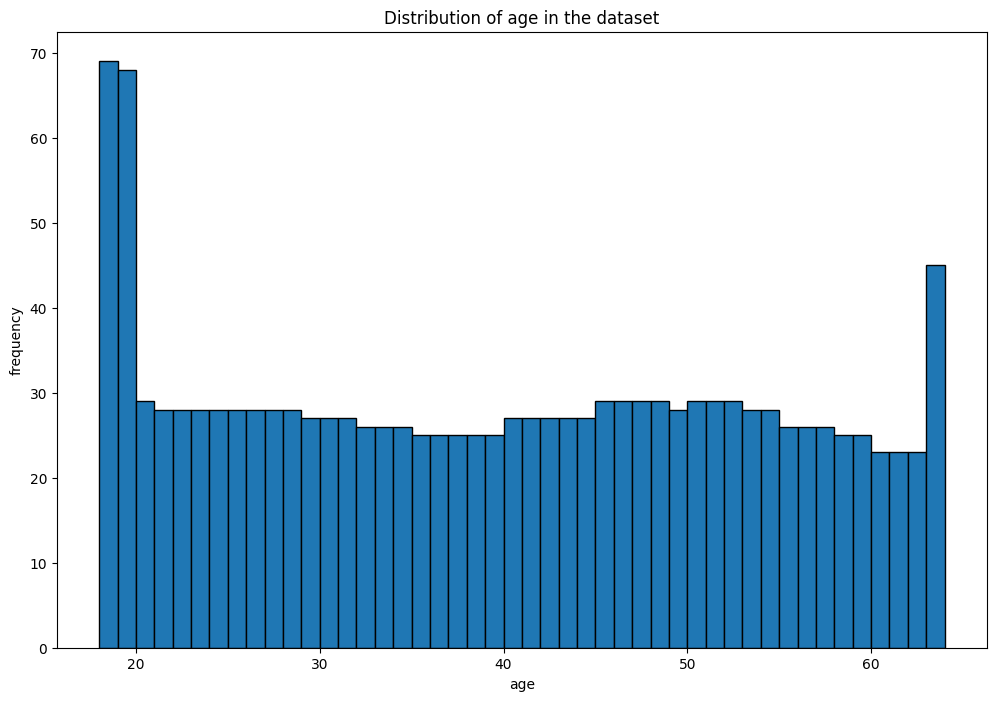

In [ ]:
### age : Numerical / quantitative

#### histogram plots

plt.figure(figsize=(12,8))
plt.hist(insurance_df['age'], bins=46, edgecolor='k')
plt.title("Distribution of age in the dataset")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

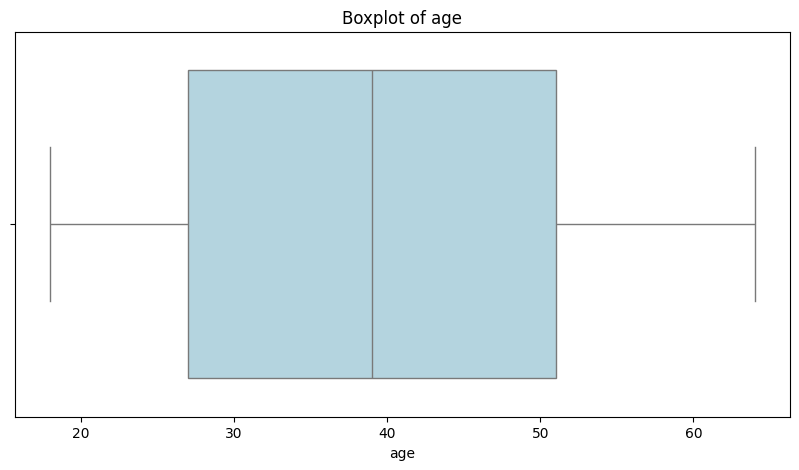

In [16]:
#### box plot

plt.figure(figsize=(10,5))
sns.boxplot(x = insurance_df['age'], color='lightblue')
plt.title("Boxplot of age")
plt.show()

In [17]:
### sex : Categorical

insurance_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex'>

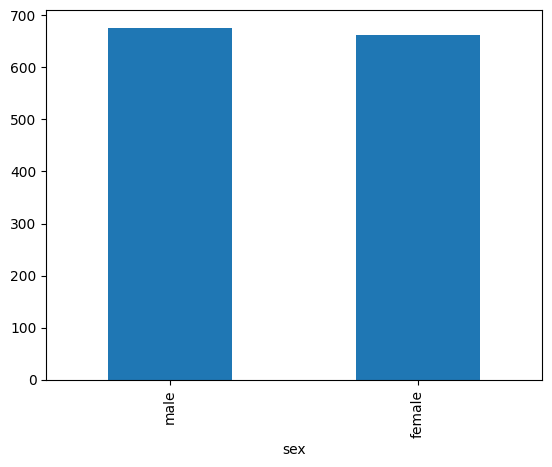

In [18]:
insurance_df['sex'].value_counts().plot(kind='bar')

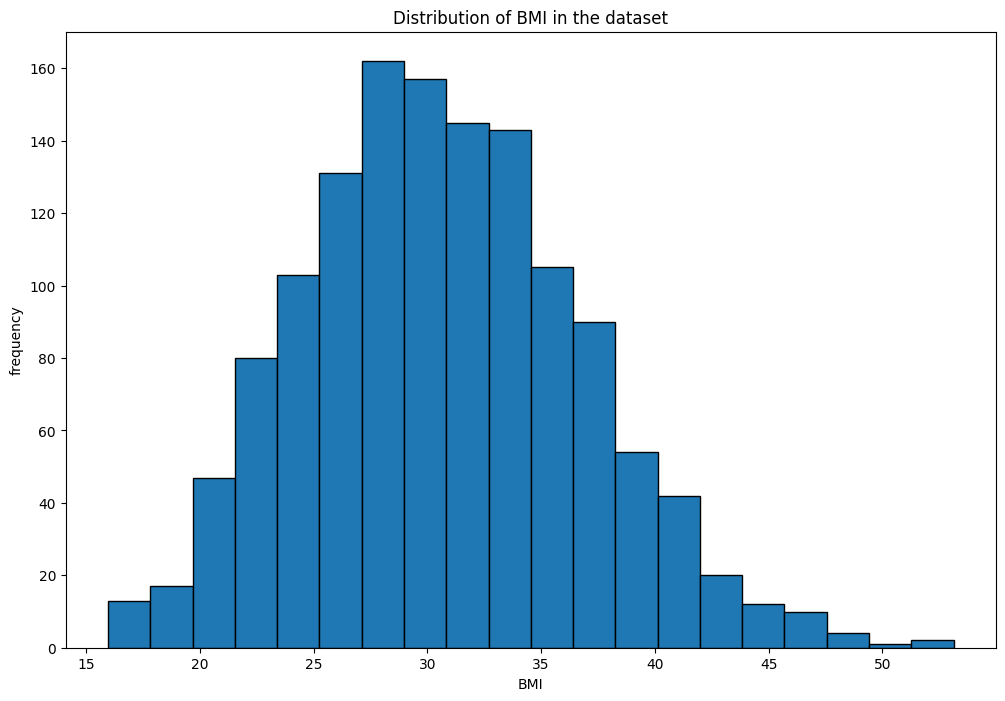

In [19]:
### bmi : quantitative

#### histogram plots

plt.figure(figsize=(12,8))
plt.hist(insurance_df['bmi'], bins=20, edgecolor='k')
plt.title("Distribution of BMI in the dataset")
plt.xlabel("BMI")
plt.ylabel("frequency")
plt.show()

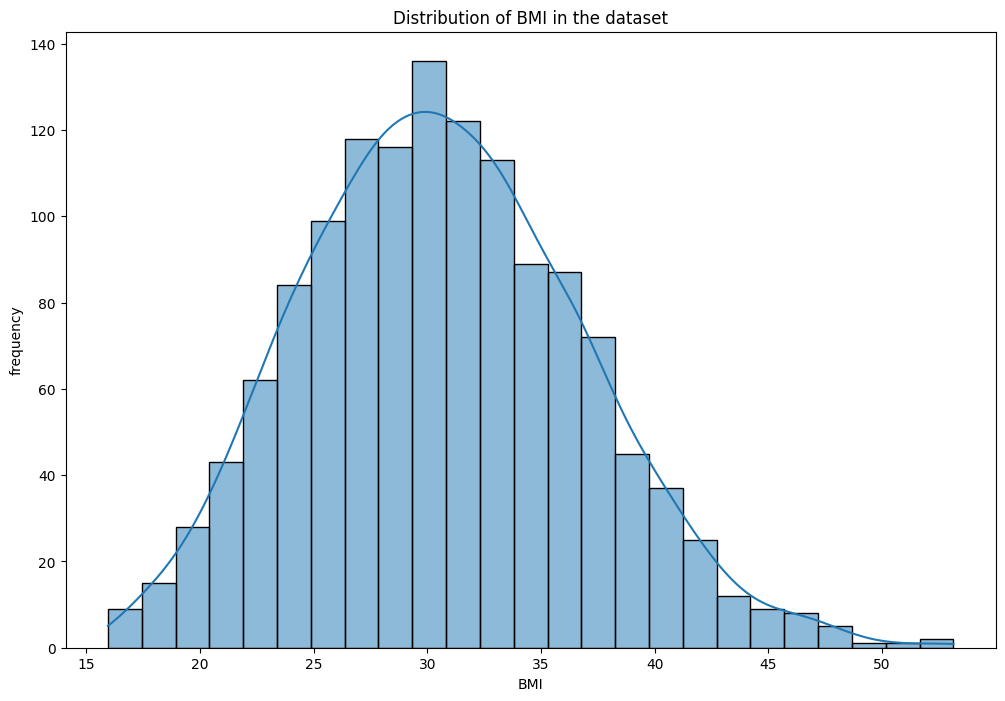

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(insurance_df['bmi'], kde=True)
plt.title("Distribution of BMI in the dataset")
plt.xlabel("BMI")
plt.ylabel("frequency")
plt.show()

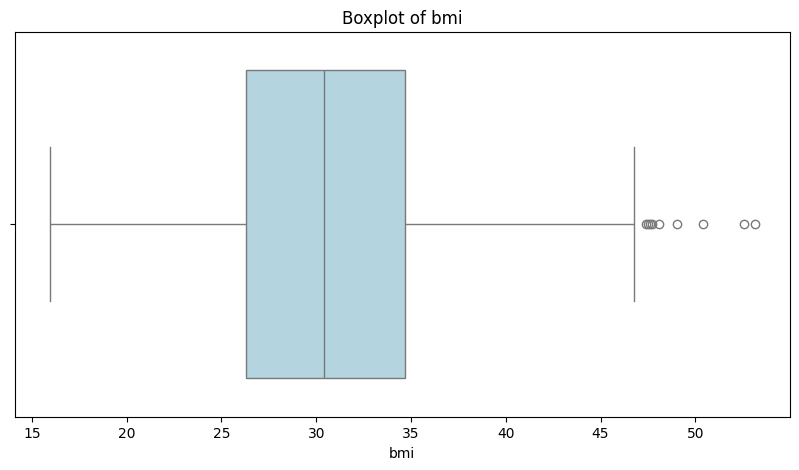

In [20]:
#### box plot

plt.figure(figsize=(10,5))
sns.boxplot(x = insurance_df['bmi'], color='lightblue')
plt.title("Boxplot of bmi")
plt.show()

In [57]:
#### skewness

def skewness_measure(x):
    mean = x.mean()
    std = x.std()
    q1, q2, q3 = x.quantile([0.25, 0.5, 0.75]).values
    mode = x.value_counts().head(1).index.values[0]

    sk1 = (mean - mode)/std
    sk2 = 3*(mean - q2)/std
    skb = (q1+q3 - 2*q2)/(q3-q1)

    print(f"Pearson's first coefficient of skewness = {sk1:.2f},\nPearson's second coefficient of skewness = {sk2:.2f},\nBowley's coefficient of skewness = {skb:.2f}")

In [58]:
skewness_measure(insurance_df['bmi'])

Pearson's first coefficient of skewness = -0.27,
Pearson's second coefficient of skewness = 0.13,
Bowley's coefficient of skewness = 0.02


In [ ]:
### Children

insurance_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

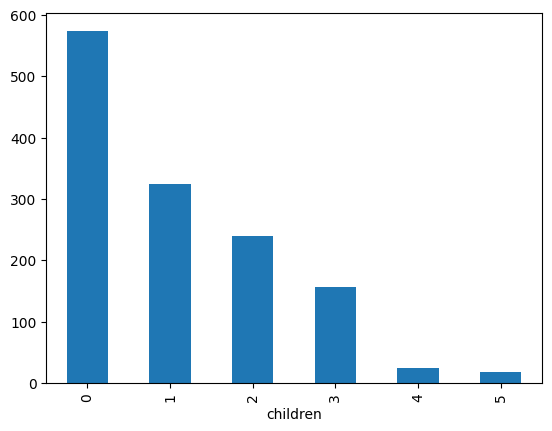

In [60]:
insurance_df['children'].value_counts().plot(kind='bar')
plt.show()

In [62]:
#### Smoker: Categorical

insurance_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [63]:
#### Region:  Categorical

insurance_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

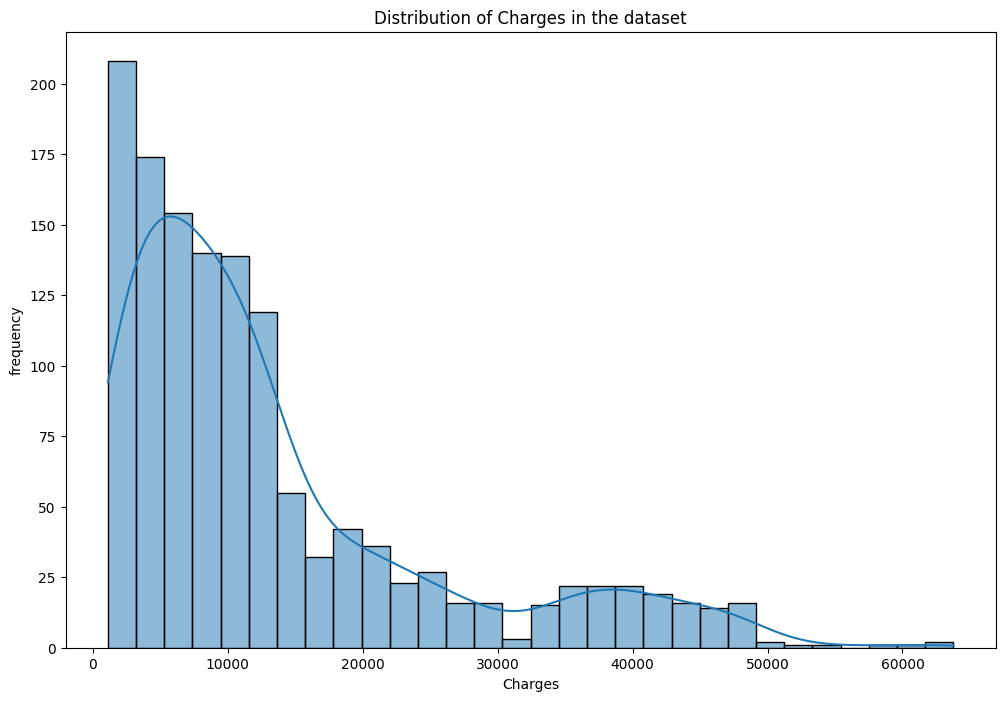

In [64]:
### Charges: quantitative

plt.figure(figsize=(12,8))
sns.histplot(insurance_df['charges'], kde=True)
plt.title("Distribution of Charges in the dataset")
plt.xlabel("Charges")
plt.ylabel("frequency")
plt.show()

In [65]:
skewness_measure(insurance_df['charges'])

Pearson's first coefficient of skewness = 0.96,
Pearson's second coefficient of skewness = 0.96,
Bowley's coefficient of skewness = 0.22


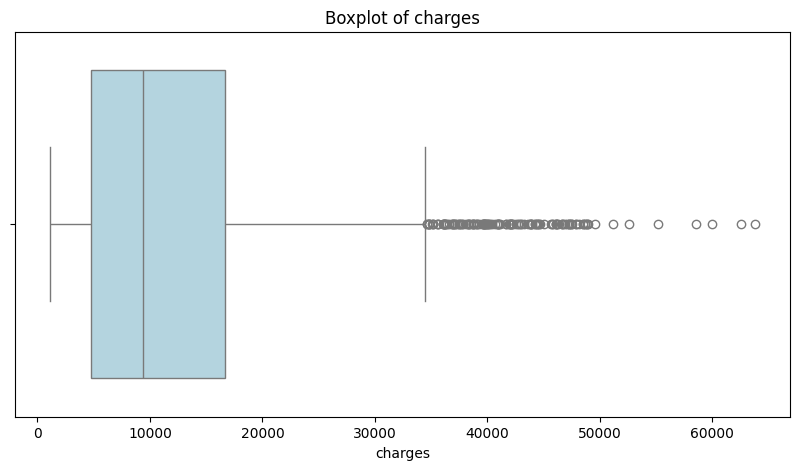

In [66]:
#### box plot

plt.figure(figsize=(10,5))
sns.boxplot(x = insurance_df['charges'], color='lightblue')
plt.title("Boxplot of charges")
plt.show()

In [67]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Bivariate analysis

- We examine and understand the relationship among two variables

1. Do charges of insurance of the people who smoke differ significantly from the people who don't?

Here we are trying to examine the relationship between smoker -> charges (C -> Q)

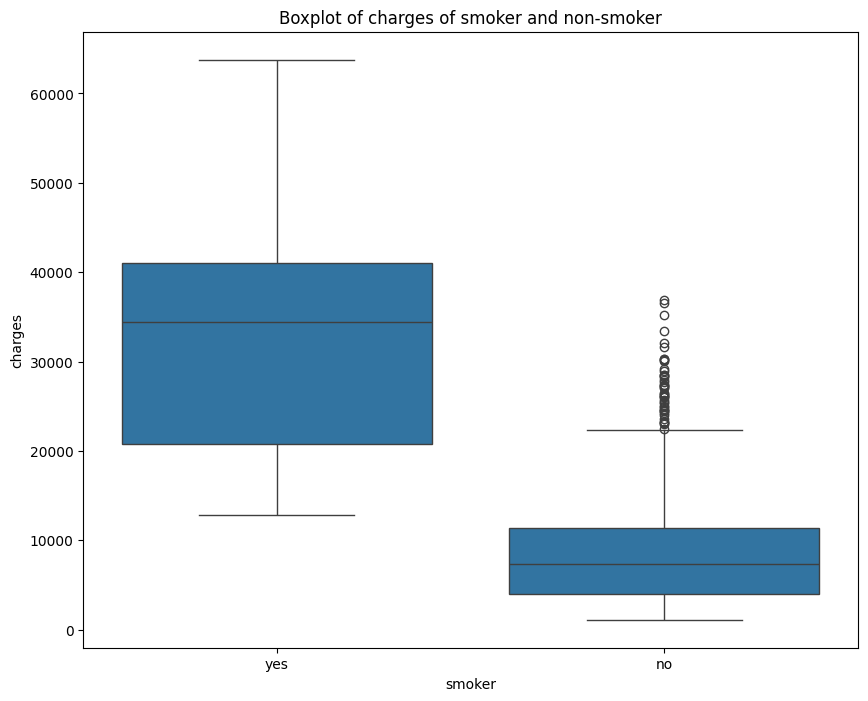

In [68]:
plt.figure(figsize=(10,8))
sns.boxplot(x = insurance_df['smoker'], y = insurance_df['charges'])
plt.title("Boxplot of charges of smoker and non-smoker")
plt.show()

Hypothesis:

H0: "Charges for smoker and non-smoker are same"

H1: "Charges for smoker and non-smoker are not same"

It's a two sided test.

significance level: 0.05

test: independent sample T-test

In [69]:
smokers_charges = np.array(insurance_df[insurance_df['smoker']=='yes']['charges'])
non_smoker_charges = np.array(insurance_df[insurance_df['smoker']=='no']['charges'])

In [89]:
from scipy.stats import ttest_ind, t

In [77]:
alpha = 0.05

In [84]:
t_test_object = ttest_ind(smokers_charges, non_smoker_charges, axis=0, equal_var=True)
t_stat = t_test_object.statistic
p_value = t_test_object.pvalue
dof = t_test_object.df

In [85]:
t_stat

np.float64(46.66492117272371)

In [86]:
p_value

np.float64(8.271435842179102e-283)

In [87]:
dof

np.float64(1336.0)

In [79]:
if p_value < alpha:
    print(f"Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis


In [ ]:
t_test_object.confidence_interval(1-alpha)

ConfidenceInterval(low=np.float64(22623.174776566604), high=np.float64(24608.75229078667))

In [ ]:
t.ppf(1-alpha/2, dof)   # critical value

np.float64(1.9617412190546957)

2. Whether the gender has any effect on smoking habits

Here we are trying to examine the relationship between sex -> smoker (C -> C)

H0: "Gender has no effect on smoking habits, these are independent"

H1: "Gender has an effect on smoking habits, these are dependent"

test: ch-square test of independence

In [98]:
alpha = 0.05

crosstab = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [92]:
from scipy.stats import chi2_contingency

In [93]:
chi2_test_result = chi2_contingency(crosstab)

In [94]:
chi2_test_result.statistic

np.float64(7.39291081459996)

In [95]:
chi2_test_result.dof

1

In [96]:
chi2_test_result.pvalue

np.float64(0.006548143503580697)

In [97]:
chi2_test_result.expected_freq

array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]])

In [99]:
if chi2_test_result.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

Reject the null hypothesis


In [100]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

3. Is there any relationship between age and bmi.

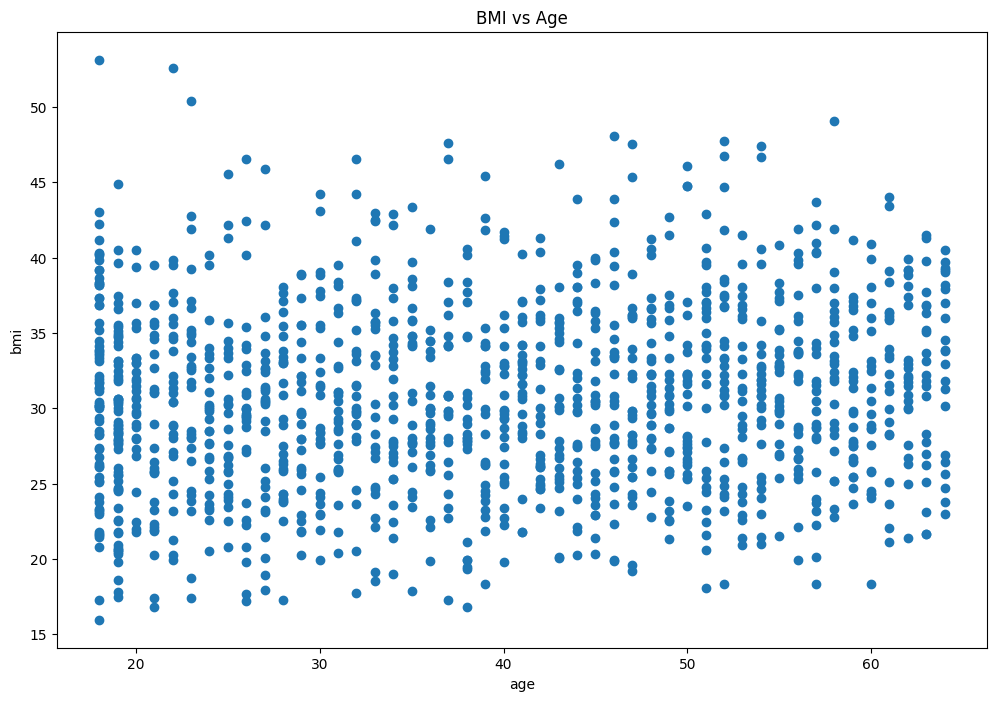

In [102]:
plt.figure(figsize=(12,8))
plt.scatter(insurance_df['age'], insurance_df['bmi'])
plt.xlabel('age')
plt.ylabel('bmi')
plt.title("BMI vs Age")
plt.show()

In [103]:
np.corrcoef(insurance_df['bmi'], insurance_df['age'])[0,1]

np.float64(0.10927188154853519)

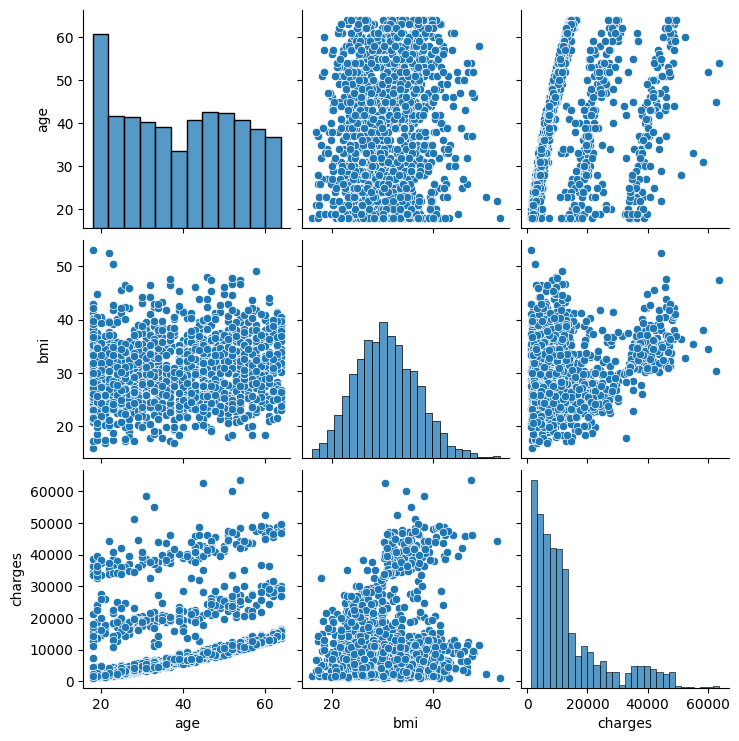

In [ ]:
sns.pairplot(insurance_df[['age', 'bmi', 'charges']])   # pair plot

In [106]:
np.corrcoef(insurance_df[['age', 'bmi', 'charges']].T)

array([[1.        , 0.10927188, 0.29900819],
       [0.10927188, 1.        , 0.19834097],
       [0.29900819, 0.19834097, 1.        ]])